In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [101]:
df = pd.read_csv("./data/traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


- weather_condition: 사고 발생 시의 날씨 조건
- lighting_condition: 사고 발생 시의 조명(밝기) 조건
- first_crash_type: 최초 충돌 유형(예: 정면충돌, 후방추돌 등)
- trafficway_type: 사고가 발생한 도로 유형(예: 고속도로, 일반도로 등)
- roadway_surface_cond: 도로 표면 상태(예: 건조, 젖음, 결빙 등)
- crash_type: 전체적인 사고 유형
- prim_contributory_cause: 사고의 주요 원인
- num_units: 사고에 관련된 차량(유닛) 수
- most_severe_injury: 사고에서 발생한 가장 심각한 부상 정도
- injuries_total: 보고된 총 부상자 수
- crash_hour: 사고가 발생한 시간(시 단위)

In [102]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributor

In [103]:
missing_values = df.isnull().sum()
print("Missing value analysis:")
missing_values

Missing value analysis:


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
# 월과 요일에 대한 정보가 수치형으로 들어가 있어 부적절함
df.select_dtypes(include=['int64','float64']).describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000,209275.000000
mean,2.063299,0.382707,0.001859,0.038103,0.221226,0.121520,2.244019,13.372897,4.144045,6.771798
std,0.396030,0.799720,0.047505,0.233971,0.614939,0.450884,1.241159,5.604019,1.966880,3.427626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [106]:
# 보니까 nan 값은 없는데 unknown 과 같이 알 수 없는 카테고리 분류가 있음 - traffic_control_device / weather_condition / lighting_condition / trafficway_type / roadway_surface_cond
# road_defect / 
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

crash_date: ['07/29/2023 01:00:00 PM' '08/13/2023 12:11:00 AM'
 '12/09/2021 10:30:00 AM' ... '09/13/2023 01:08:00 PM'
 '10/23/2019 01:32:00 PM' '06/01/2020 03:23:00 PM']
traffic_control_device: ['TRAFFIC SIGNAL' 'NO CONTROLS' 'STOP SIGN/FLASHER' 'UNKNOWN' 'OTHER'
 'PEDESTRIAN CROSSING SIGN' 'OTHER WARNING SIGN' 'YIELD'
 'FLASHING CONTROL SIGNAL' 'LANE USE MARKING' 'OTHER REG. SIGN'
 'DELINEATORS' 'SCHOOL ZONE' 'POLICE/FLAGMAN' 'NO PASSING'
 'RR CROSSING SIGN' 'RAILROAD CROSSING GATE' 'BICYCLE CROSSING SIGN'
 'OTHER RAILROAD CROSSING']
weather_condition: ['CLEAR' 'RAIN' 'SNOW' 'CLOUDY/OVERCAST' 'UNKNOWN' 'FOG/SMOKE/HAZE'
 'BLOWING SNOW' 'FREEZING RAIN/DRIZZLE' 'OTHER' 'SLEET/HAIL'
 'SEVERE CROSS WIND GATE' 'BLOWING SAND, SOIL, DIRT']
lighting_condition: ['DAYLIGHT' 'DARKNESS, LIGHTED ROAD' 'DUSK' 'DARKNESS' 'UNKNOWN' 'DAWN']
first_crash_type: ['TURNING' 'REAR END' 'ANGLE' 'FIXED OBJECT' 'REAR TO FRONT'
 'SIDESWIPE SAME DIRECTION' 'SIDESWIPE OPPOSITE DIRECTION' 'PEDALCYCLIST'
 'PEDESTRIA

## 전처리
- 'crash_date' 날짜 정보로부터 월, 요일에 대한 정보 추출, 시각화를 위해 기존 수치형 변수 컬럼을 범주형으로 대체
- 결측치 없음
- 대부분이 범주형이며, 수치형 변수들 중 injury의 이상치는 부상 정도에 포함되어야할 중요한 정보이므로 처리 안함

In [107]:
# 월과, 요일에 대한 정보가 알아보기 힘들게 숫자로 되어있음.
# 날짜 데이터로부터 월과 요일에 대한 정보를 문자열로 다시 처리
print(df["crash_date"][:3])
print(df["crash_month"][:3])
print(df["crash_day_of_week"][:3])

0    07/29/2023 01:00:00 PM
1    08/13/2023 12:11:00 AM
2    12/09/2021 10:30:00 AM
Name: crash_date, dtype: object
0     7
1     8
2    12
Name: crash_month, dtype: int64
0    7
1    1
2    5
Name: crash_day_of_week, dtype: int64


In [108]:
# 날짜 정보로부터 월, 요일에 대한 정보를 추출할 수 있도록 datetime 형식으로 변경
df["crash_date"] = pd.to_datetime(df["crash_date"], format='%m/%d/%Y %I:%M:%S %p')
df["crash_date"]

0        2023-07-29 13:00:00
1        2023-08-13 00:11:00
2        2021-12-09 10:30:00
3        2023-08-09 19:55:00
4        2023-08-19 14:55:00
                 ...        
209301   2023-09-13 13:08:00
209302   2023-07-18 14:10:00
209303   2019-10-23 13:32:00
209304   2020-06-01 15:23:00
209305   2022-12-16 12:10:00
Name: crash_date, Length: 209275, dtype: datetime64[ns]

In [109]:
# 기존 값을 문자열로 덮어쓰기
df["crash_month"]=df["crash_date"].dt.month_name()
df["crash_day_of_week"]=df["crash_date"].dt.day_name()

print(df["crash_month"][:3])
print(df["crash_day_of_week"][:3])

0        July
1      August
2    December
Name: crash_month, dtype: object
0    Saturday
1      Sunday
2    Thursday
Name: crash_day_of_week, dtype: object


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209275 non-null  datetime64[ns]
 1   traffic_control_device         209275 non-null  object        
 2   weather_condition              209275 non-null  object        
 3   lighting_condition             209275 non-null  object        
 4   first_crash_type               209275 non-null  object        
 5   trafficway_type                209275 non-null  object        
 6   alignment                      209275 non-null  object        
 7   roadway_surface_cond           209275 non-null  object        
 8   road_defect                    209275 non-null  object        
 9   crash_type                     209275 non-null  object        
 10  intersection_related_i         209275 non-null  object        
 11  damag

## 변수들 간의 관계 시각화

- 수치형 변수들과 범주형 변수들별로 히스토그램을 출력해서 각 변수에 따른 사고 건수를 조회해봄
- 사고 건수와 관련 있는 변수들만 추출하기 위함

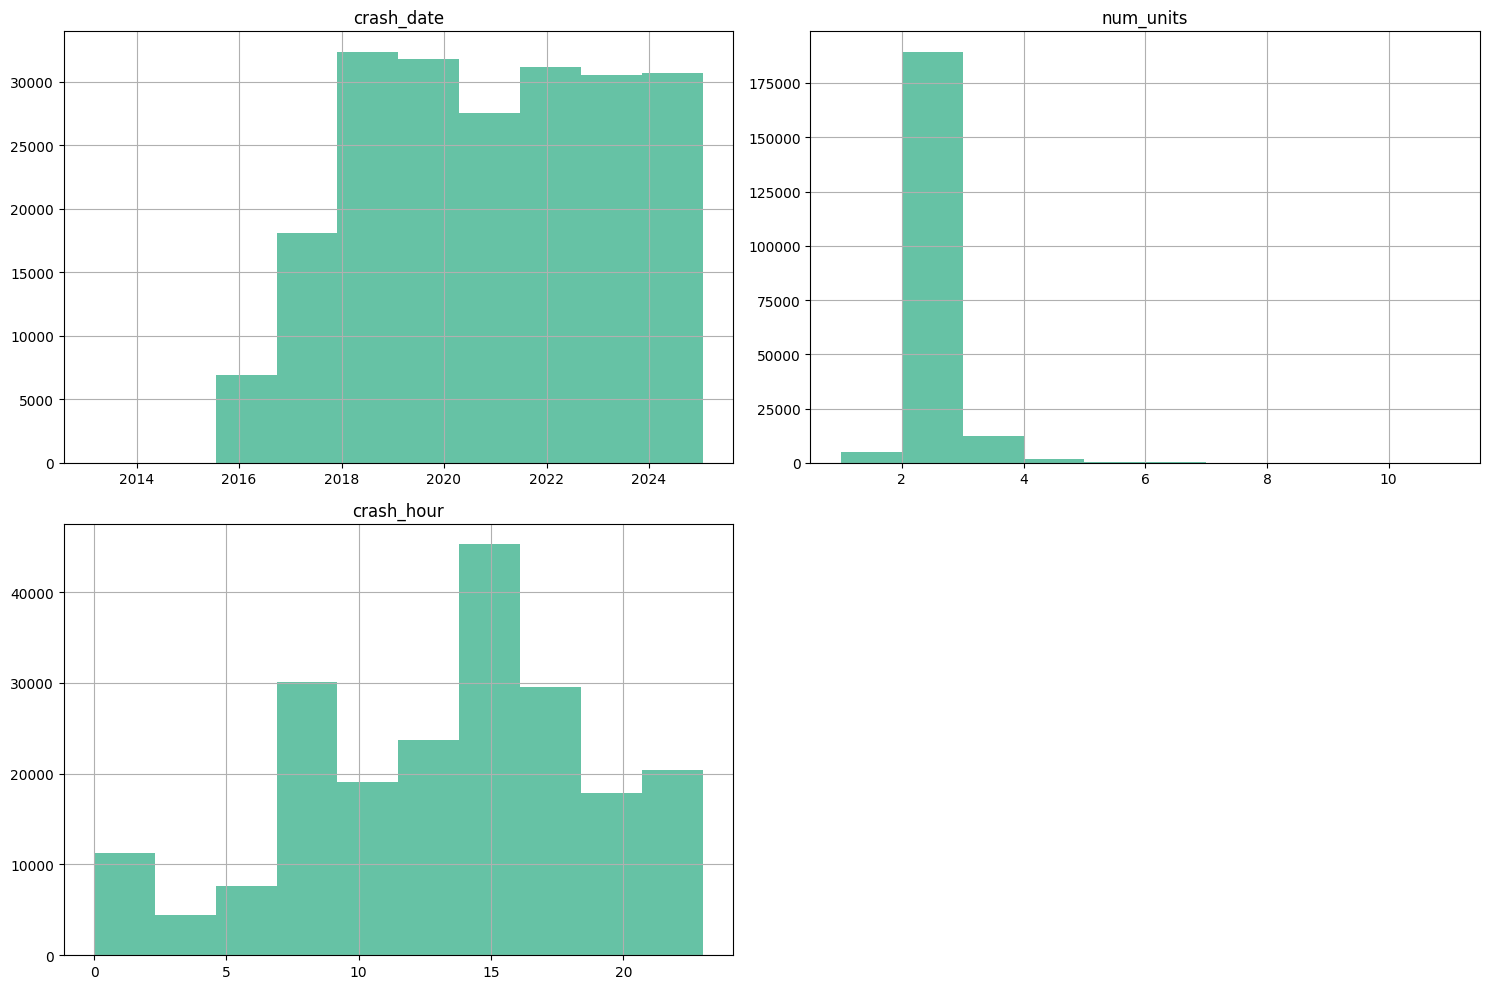

In [112]:
# 수치형 변수들의 히스토그램을 그려본 결과, 사고 수는 날짜, 차량 대수보다는 사고 시간대와 관련이 있음
injury_cols = [
    'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
    'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication'
]
cat_cols = df.select_dtypes(include=['int64', 'float']).columns.tolist()
num_cols = [col for col in df.columns if col not in injury_cols]

df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

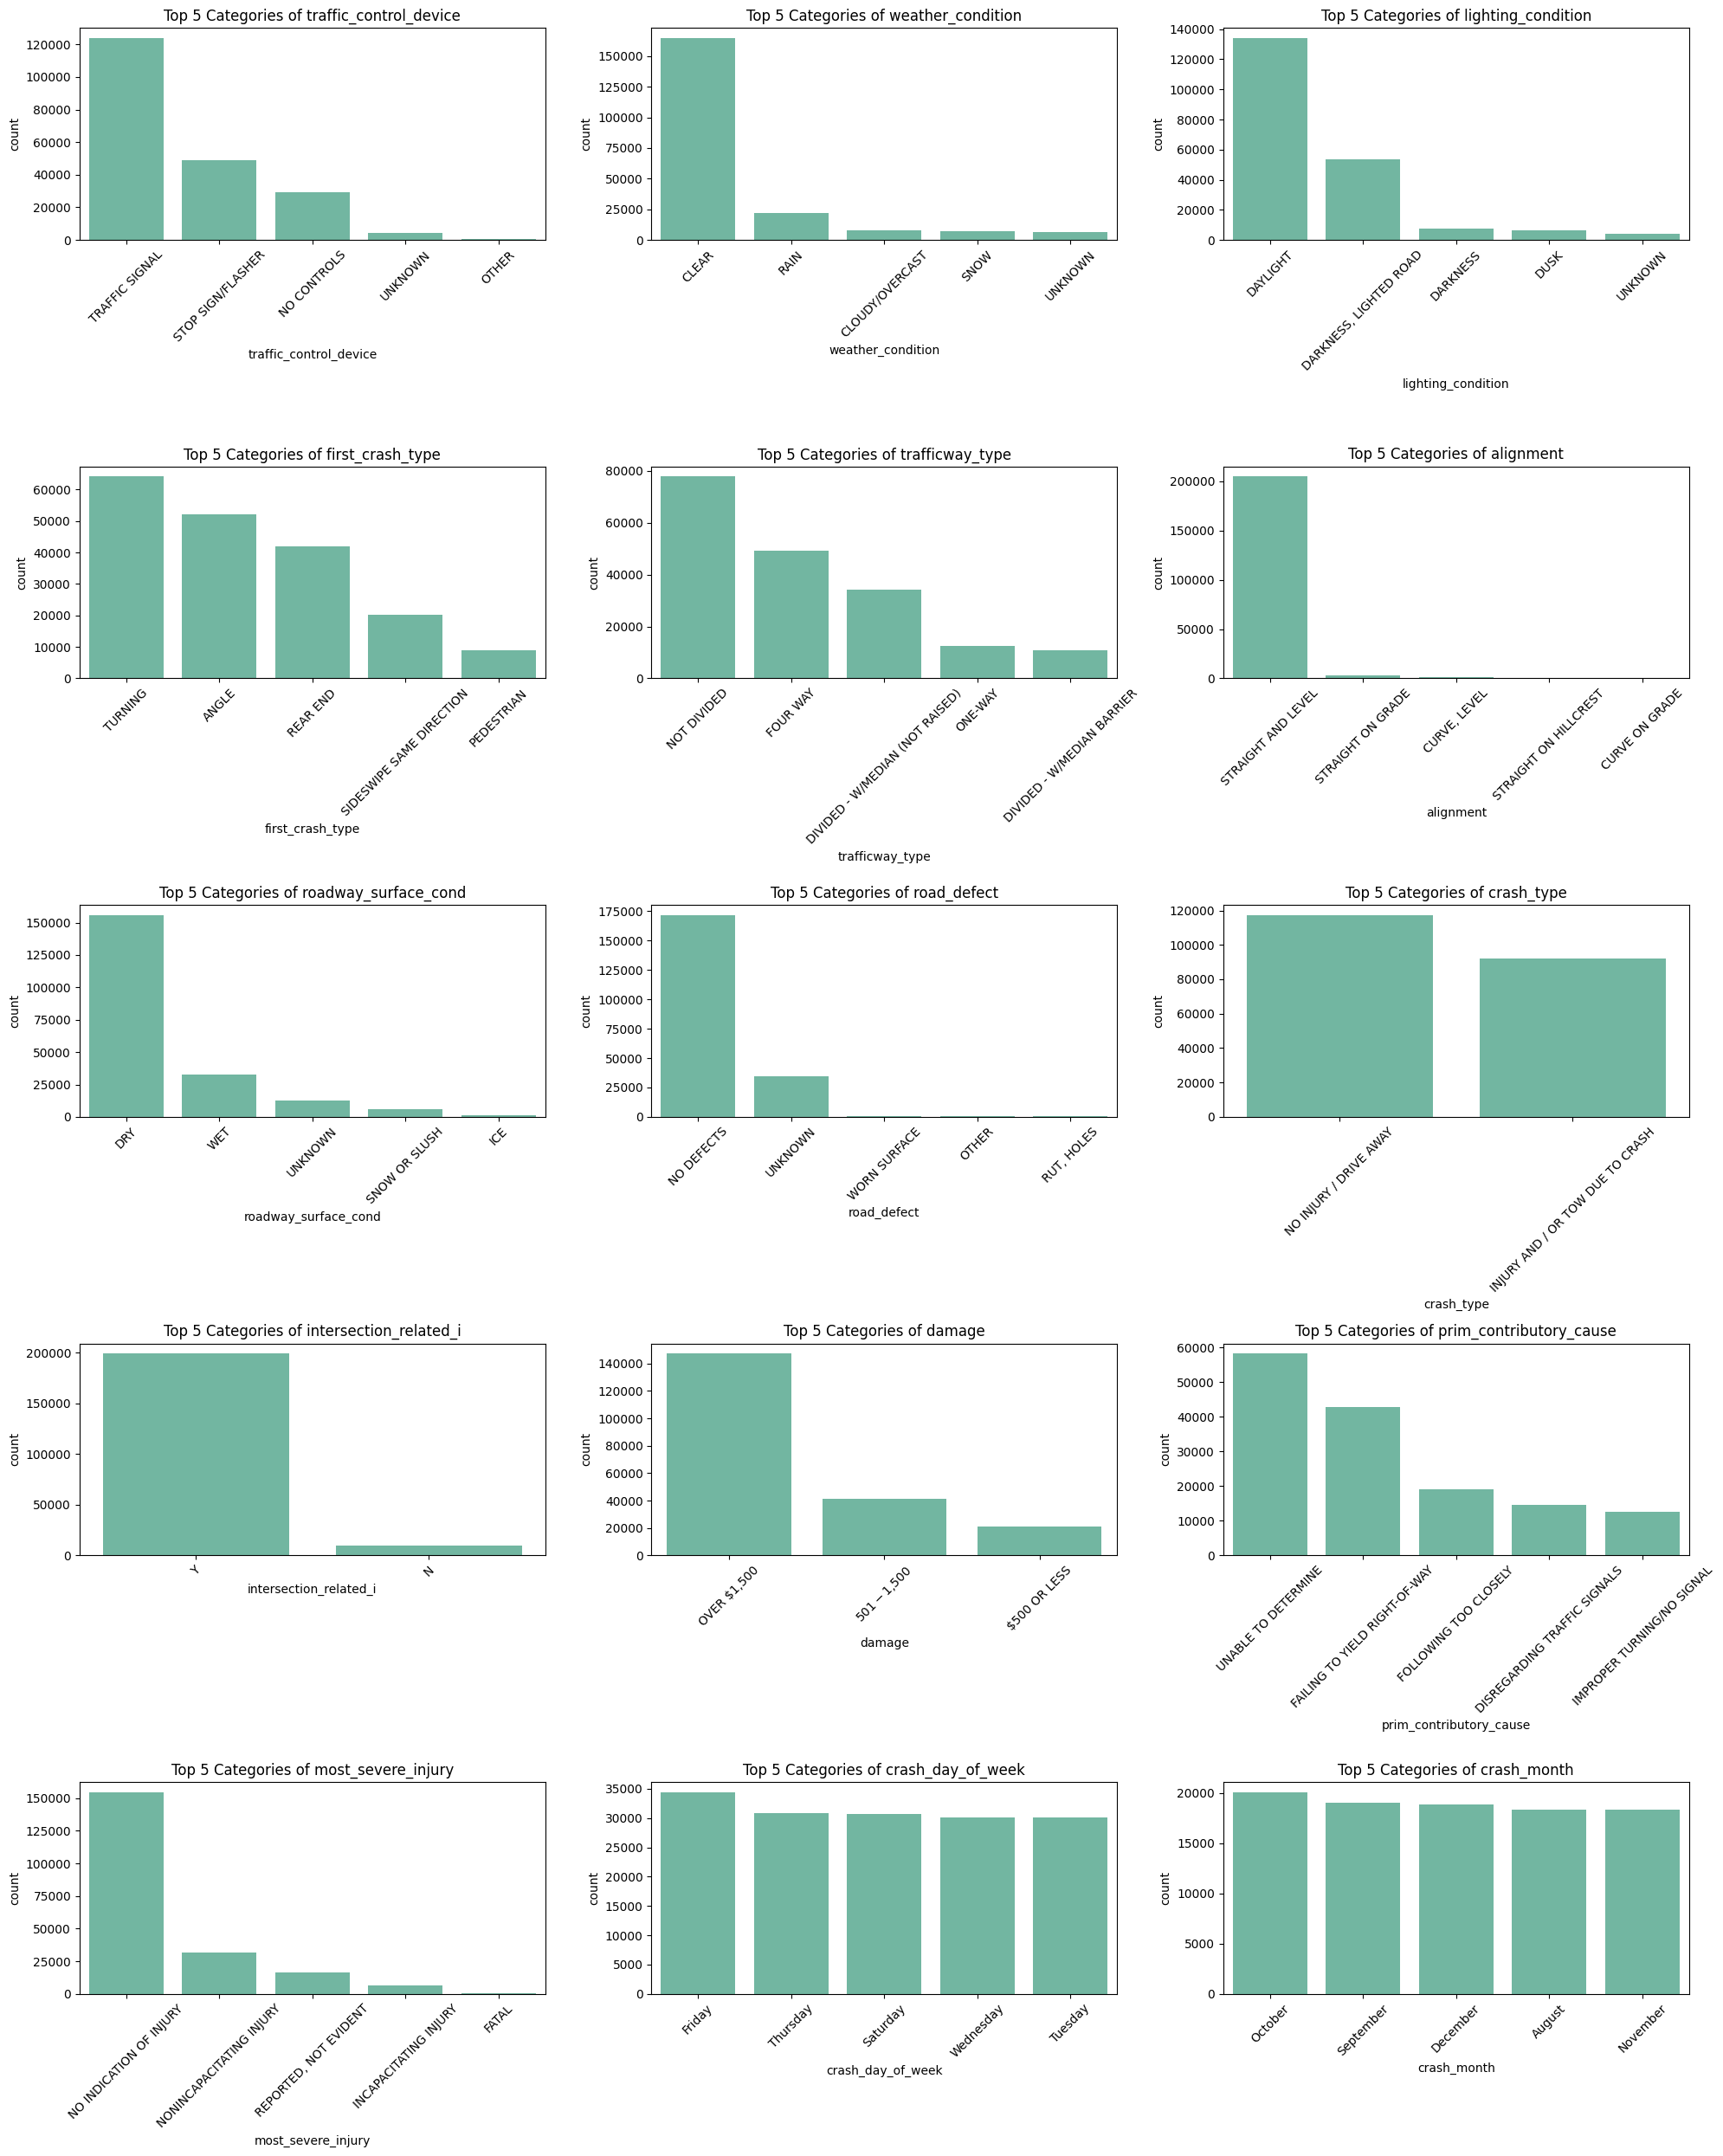

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
top_n = 5

cols_per_row = 3  # 3열로 변경
rows = math.ceil(len(cat_cols) / cols_per_row)

plt.figure(figsize=(20, rows * 5))  # 가로 사이즈 좀 더 넓게

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    
    top_categories = df[col].value_counts().nlargest(top_n).index
    filtered_df = df[df[col].isin(top_categories)]
    
    sns.countplot(data=filtered_df, x=col, order=top_categories)
    plt.title(f"Top {top_n} Categories of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# 도심지역이다 보니까 crash type과 most severe injury를 보니 사고 발생 시 부상 정도는 부상 없음 - 경상이 압도적으로 많아 사고 났을 때의 인명피해와의 관련성이 적었음. 따라서 사고 수 자체를 가지고 비교하기로 함
# 날씨, 도로 노면 조건, 도로 모양(alignment), 교통통제장치와는 관련이 없었음 - 도로 노면과 형태가 안좋을 수록, 날씨가 안좋을 수록 운전을 조심하는 성향, 신호등있는 곳에서 많이 난걸 보면 차들 간의 움직임과 관련 있는 것으로 추정
# 범주형 변수들에 대한 count plot 결과 조도, traffic way type, 교차로 여부, 요일과 시간대가 사고 수와 관련이 있었음.


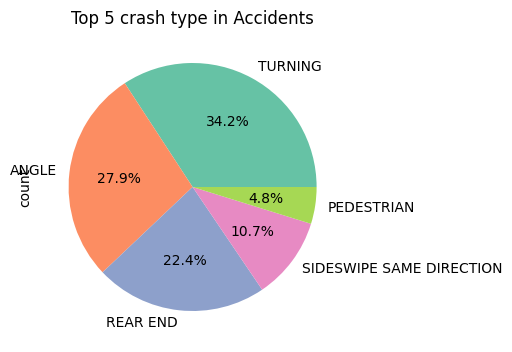

In [114]:
# pie chart for top 5 Crash types
plt.figure(figsize=(4, 6))
df['first_crash_type'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 crash type in Accidents')
plt.show()
plt.close()

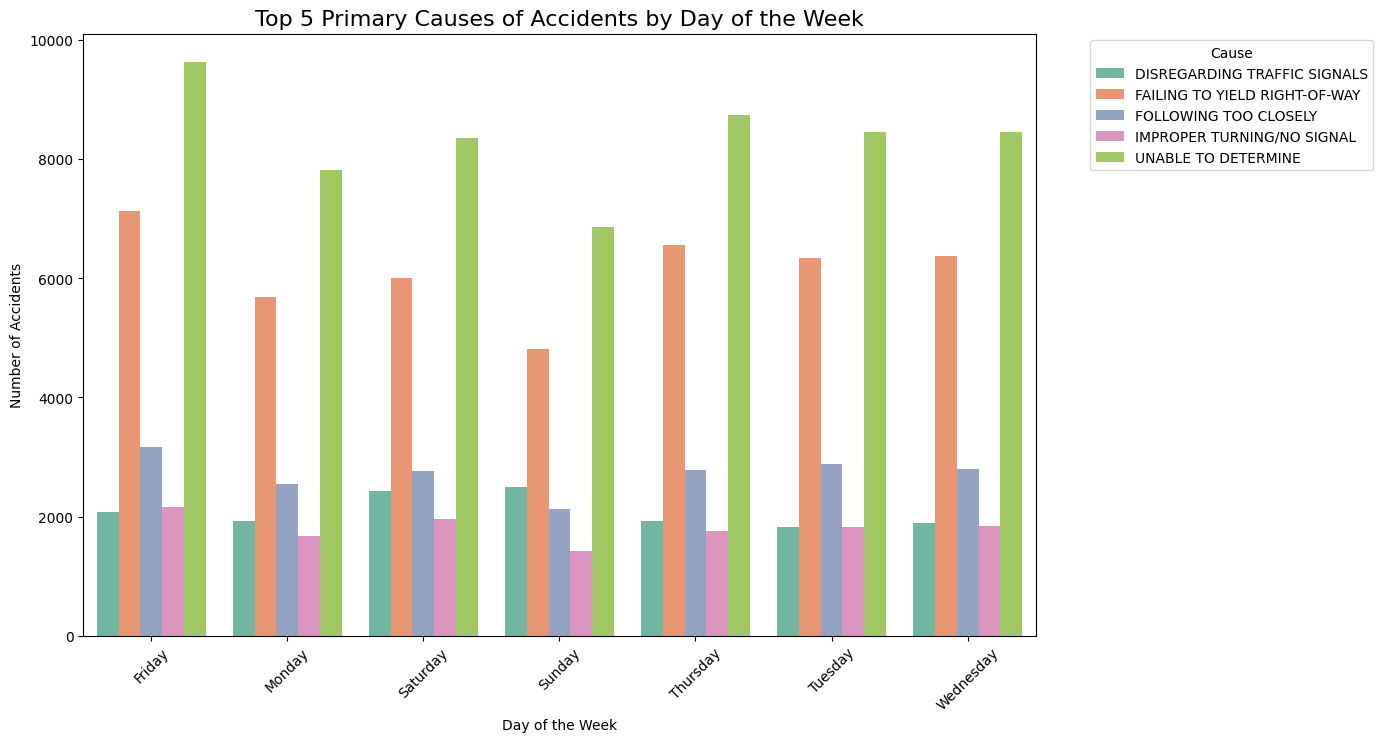

In [ ]:
# Get Top 5 Causes
clean_data = df.dropna(subset=['prim_contributory_cause', 'crash_day_of_week'])
top_causes = clean_data['prim_contributory_cause'].value_counts(dropna=True).nlargest(5).index

# Filter dataset to only top causes
top_cause_data = clean_data[clean_data['prim_contributory_cause'].isin(top_causes)]

# Group and plot
cause_day_counts = top_cause_data.groupby(['prim_contributory_cause', 'crash_day_of_week']).size().reset_index(name='count')

# Plt
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
sns.barplot(data=cause_day_counts,
            x='crash_day_of_week',
            y='count',
            hue='prim_contributory_cause')

plt.title("Top 5 Primary Causes of Accidents by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.legend(title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

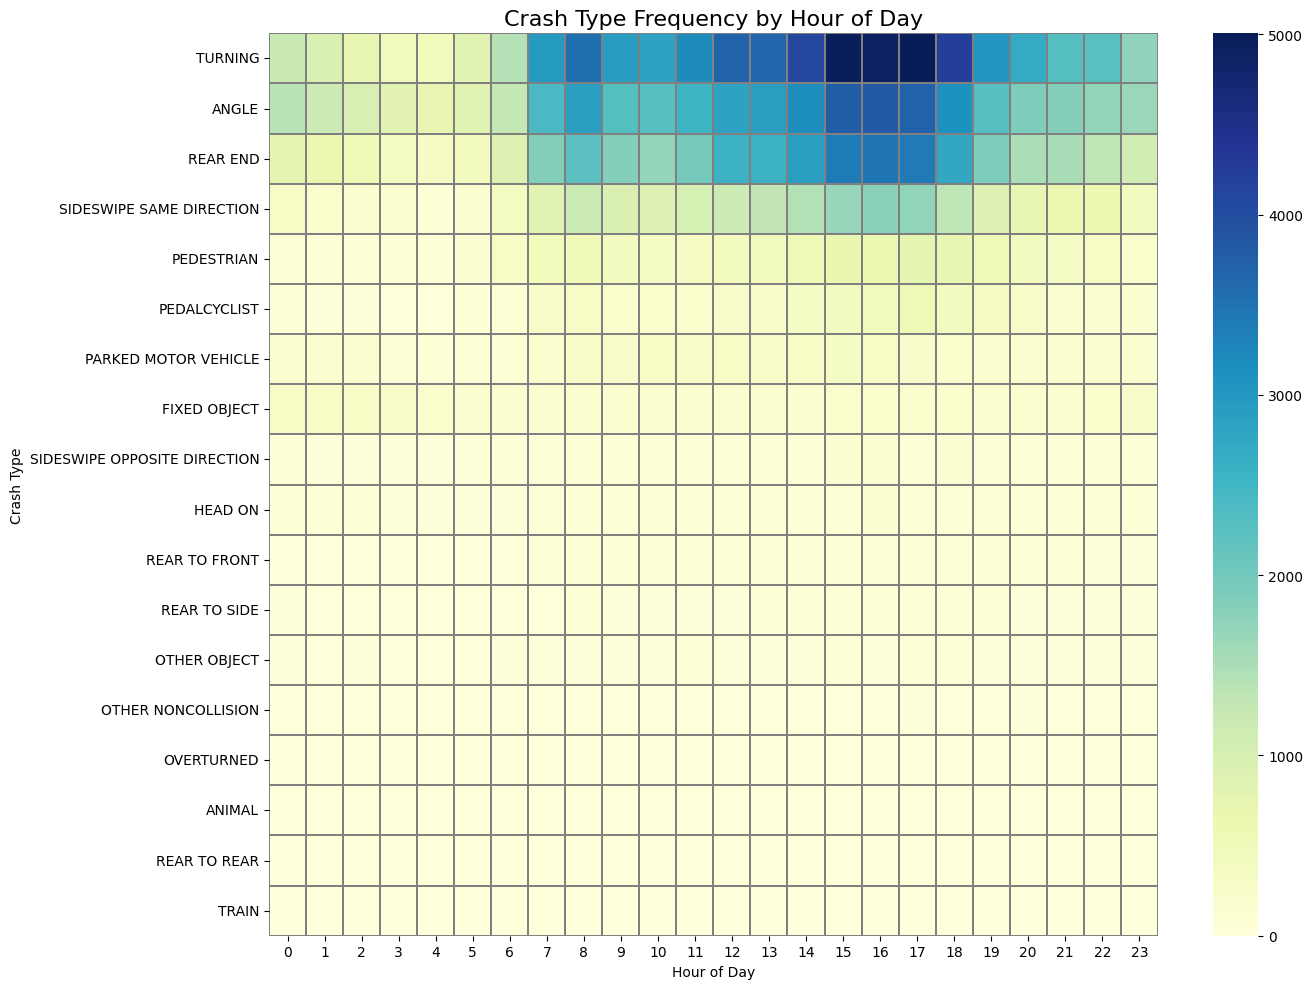

In [84]:
# Drop NaNs
heatmap_data = df.dropna(subset=['first_crash_type', 'crash_hour'])

# Group and pivot
crash_type_hour = heatmap_data.groupby(['first_crash_type', 'crash_hour']).size().reset_index(name='count')
heatmap_pivot = crash_type_hour.pivot(index='first_crash_type', columns='crash_hour', values='count').fillna(0)

# Optional: sort rows by total crash count to show most frequent at top
heatmap_pivot = heatmap_pivot.loc[heatmap_pivot.sum(axis=1).sort_values(ascending=False).index]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', linewidths=0.3, linecolor='gray')

plt.title("Crash Type Frequency by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Crash Type")
plt.tight_layout()
plt.show()

C:\Users\whene\AppData\Local\Temp\ipykernel_13532\3819245554.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intersection_counts.index, y=intersection_counts.values, palette='pastel', ax=ax0)


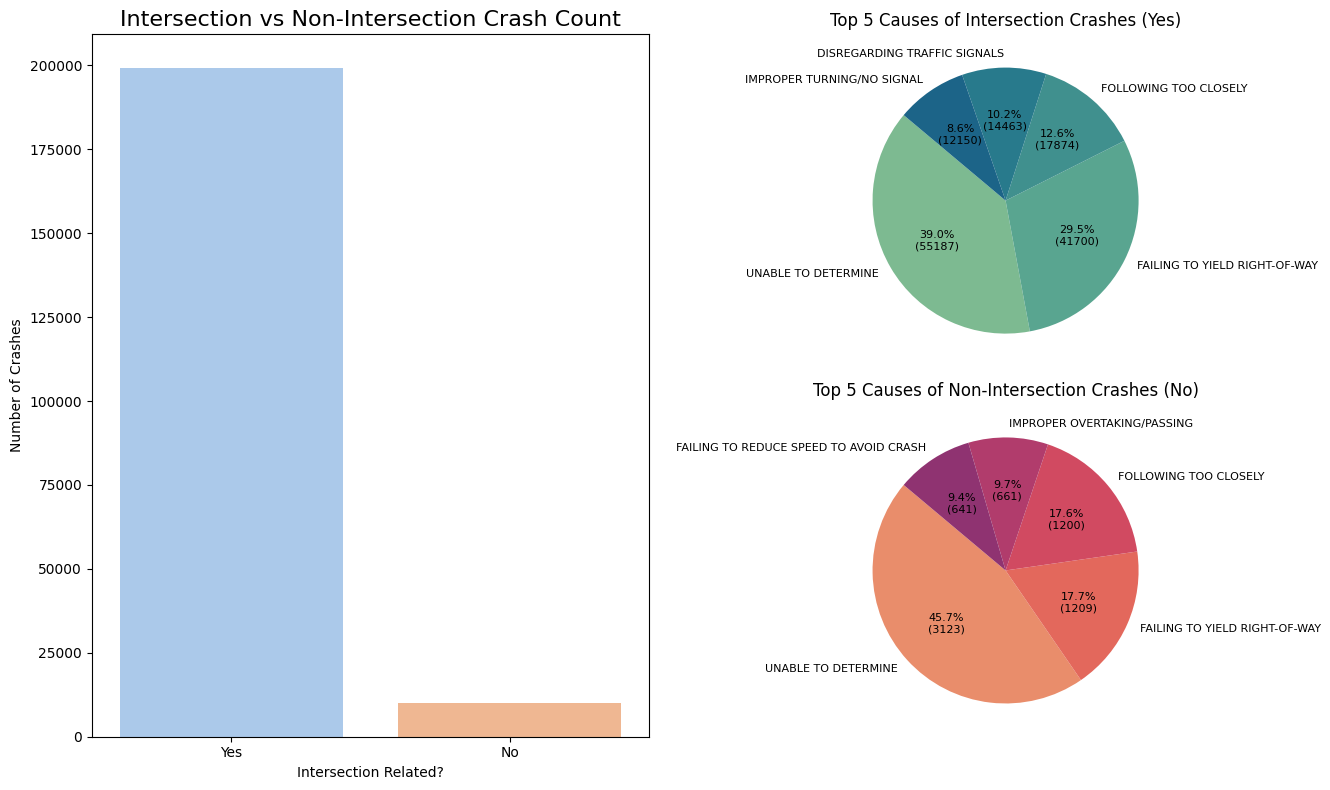

In [85]:
import matplotlib.gridspec as gridspec

df['intersection_related_i'] = df['intersection_related_i'].replace({'Y': 'Yes', 'N': 'No'})

# Prepare main bar data
intersection_counts = df['intersection_related_i'].value_counts()

# Prepare pie chart data
intersection_only = df[df['intersection_related_i'] == 'Yes']
non_intersection = df[df['intersection_related_i'] == 'No']

top5_yes = intersection_only['prim_contributory_cause'].value_counts().nlargest(5)
top5_no = non_intersection['prim_contributory_cause'].value_counts().nlargest(5)

# Pie chart % labels
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Set up GridSpec for layout
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1.5, 1.5], height_ratios=[1, 1])

ax0 = plt.subplot(gs[:, 0])
sns.barplot(x=intersection_counts.index, y=intersection_counts.values, palette='pastel', ax=ax0)
ax0.set_title("Intersection vs Non-Intersection Crash Count", fontsize=16)
ax0.set_xlabel("Intersection Related?")
ax0.set_ylabel("Number of Crashes")

ax1 = plt.subplot(gs[0, 1])
ax1.pie(top5_yes.values, labels=top5_yes.index, autopct=autopct_format(top5_yes.values), 
        startangle=140, colors=sns.color_palette('crest'), textprops={'fontsize': 8},)
ax1.set_title("Top 5 Causes of Intersection Crashes (Yes)", fontsize=12)

ax2 = plt.subplot(gs[1, 1])
ax2.pie(top5_no.values, labels=top5_no.index, autopct=autopct_format(top5_no.values), 
        startangle=140, colors=sns.color_palette('flare'), textprops={'fontsize': 8},)
ax2.set_title("Top 5 Causes of Non-Intersection Crashes (No)", fontsize=12)

plt.tight_layout()
plt.show()

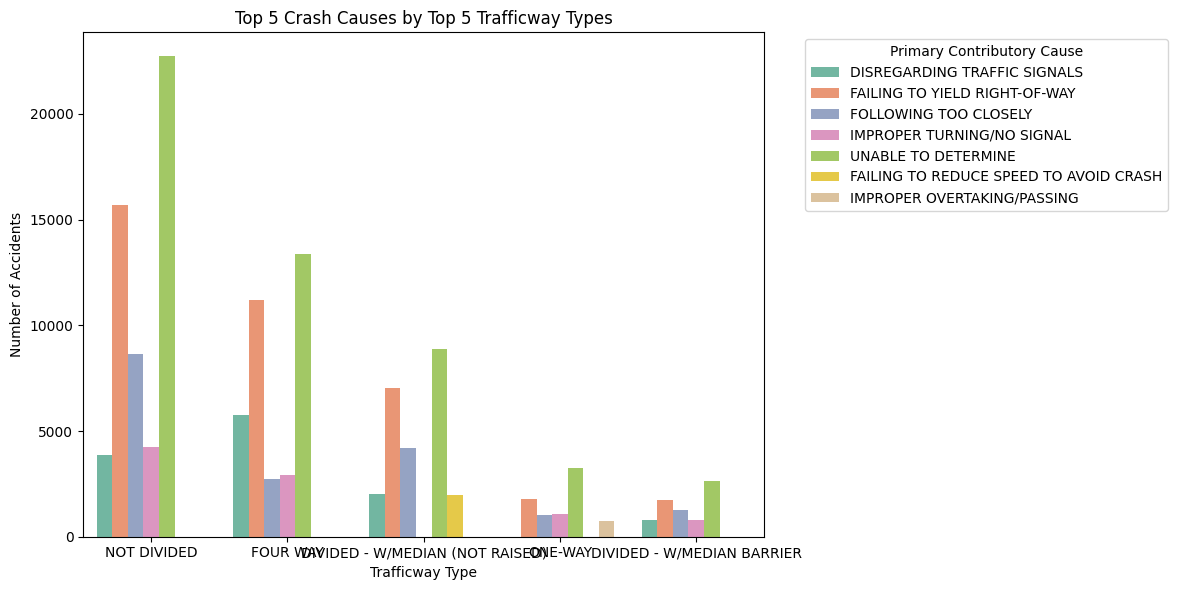

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_n_trafficway = 5
top_n_causes_per_trafficway = 5

# trafficway_type 상위 5개 추출
top_trafficways = df['trafficway_type'].value_counts().nlargest(top_n_trafficway).index

# 각 도로 유형별 주요 사고 원인 5개씩 추출해서 데이터프레임 합치기
plot_data = []

for t_type in top_trafficways:
    sub_df = df[df['trafficway_type'] == t_type]
    top_causes = sub_df['prim_contributory_cause'].value_counts().nlargest(top_n_causes_per_trafficway).index
    filtered = sub_df[sub_df['prim_contributory_cause'].isin(top_causes)]
    
    # 각 사고 원인별 사고 수 집계
    counts = filtered.groupby('prim_contributory_cause').size().reset_index(name='count')
    counts['trafficway_type'] = t_type
    plot_data.append(counts)

plot_df = pd.concat(plot_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='trafficway_type', y='count', hue='prim_contributory_cause')

plt.title(f'Top {top_n_causes_per_trafficway} Crash Causes by Top {top_n_trafficway} Trafficway Types')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Primary Contributory Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

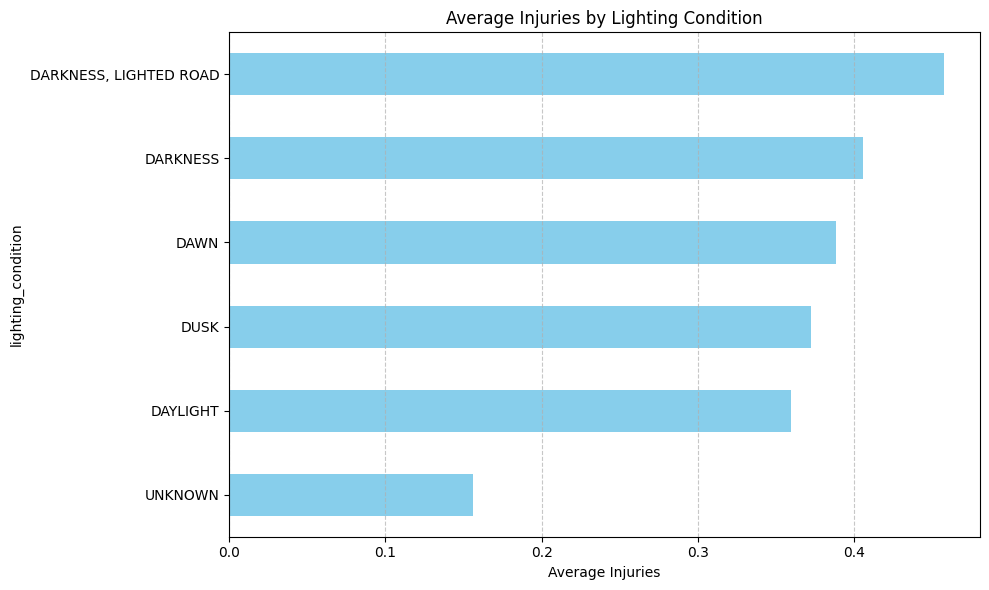

In [87]:
#Average Injuries by Lighting Condition
avg_injuries_by_light = df.groupby('lighting_condition')['injuries_total'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_injuries_by_light.plot(kind='barh', color='skyblue')
plt.xlabel("Average Injuries")
plt.title("Average Injuries by Lighting Condition")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 부상 정도와 관련 있는 변수들 조회
- 사고 건수와 관련있는 변수들
    -'lighting_condition', 'intersection_related_i', 'trafficway_type', 'crash_hour', 'crash_day_of_week'
- 각 변수들에 대한 부상정도와의 관계를 조회
- 부상정도와 관련된 변수들이 다중분류를 위해 학습될 feature들

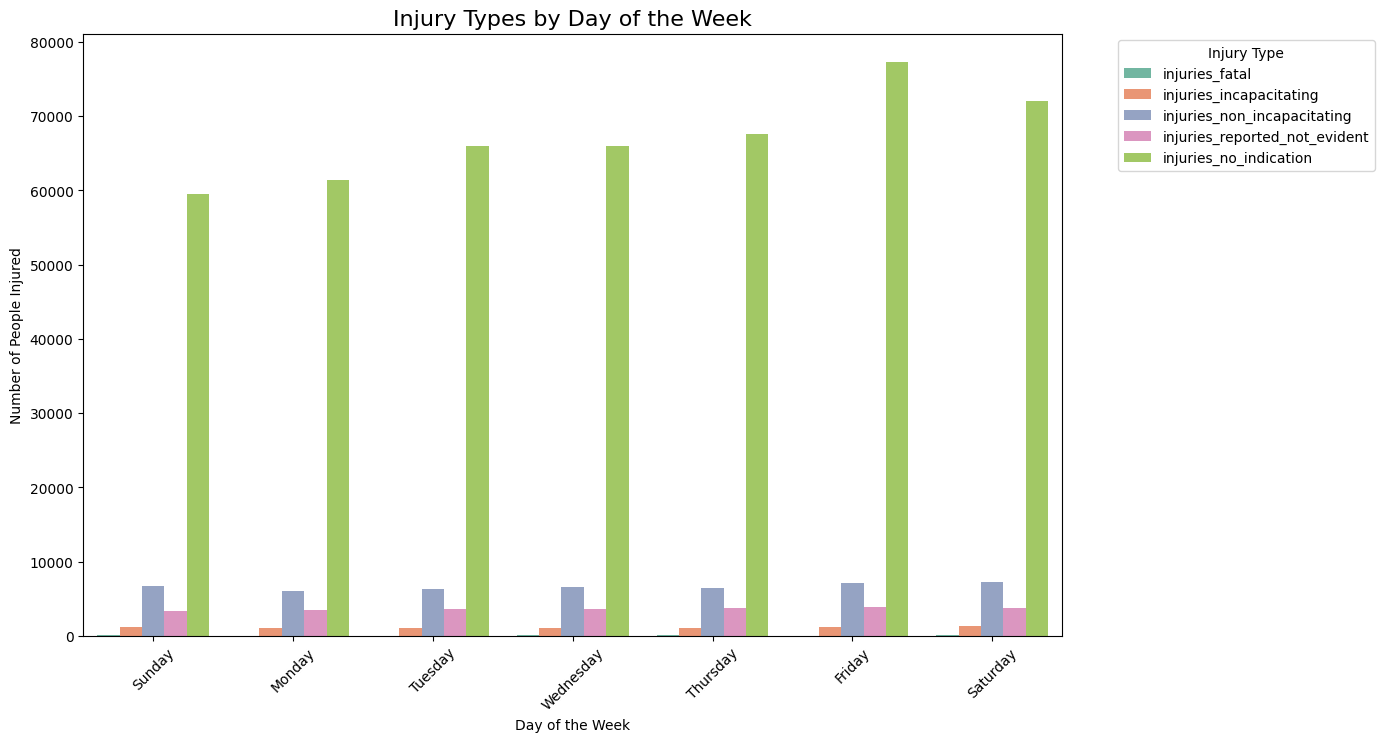

In [117]:
# 필요한 컬럼
injury_cols = [
    'injuries_fatal', 'injuries_incapacitating',
    'injuries_non_incapacitating', 'injuries_reported_not_evident',
    'injuries_no_indication'
]

# NaN 제거
clean_data = df.dropna(subset=['crash_day_of_week'])

# 요일별로 부상 종류별 합계 집계
injury_by_day = clean_data.groupby('crash_day_of_week')[injury_cols].sum().reset_index()

# melt로 long-form 변환 (시각화용)
injury_by_day_melted = injury_by_day.melt(id_vars='crash_day_of_week',
                                          var_name='injury_type',
                                          value_name='count')

# 요일 순서 정렬
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
injury_by_day_melted['crash_day_of_week'] = pd.Categorical(injury_by_day_melted['crash_day_of_week'],
                                                            categories=weekday_order,
                                                            ordered=True)

# 시각화
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
sns.barplot(data=injury_by_day_melted,
            x='crash_day_of_week',
            y='count',
            hue='injury_type')

plt.title("Injury Types by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Number of People Injured")
plt.legend(title="Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

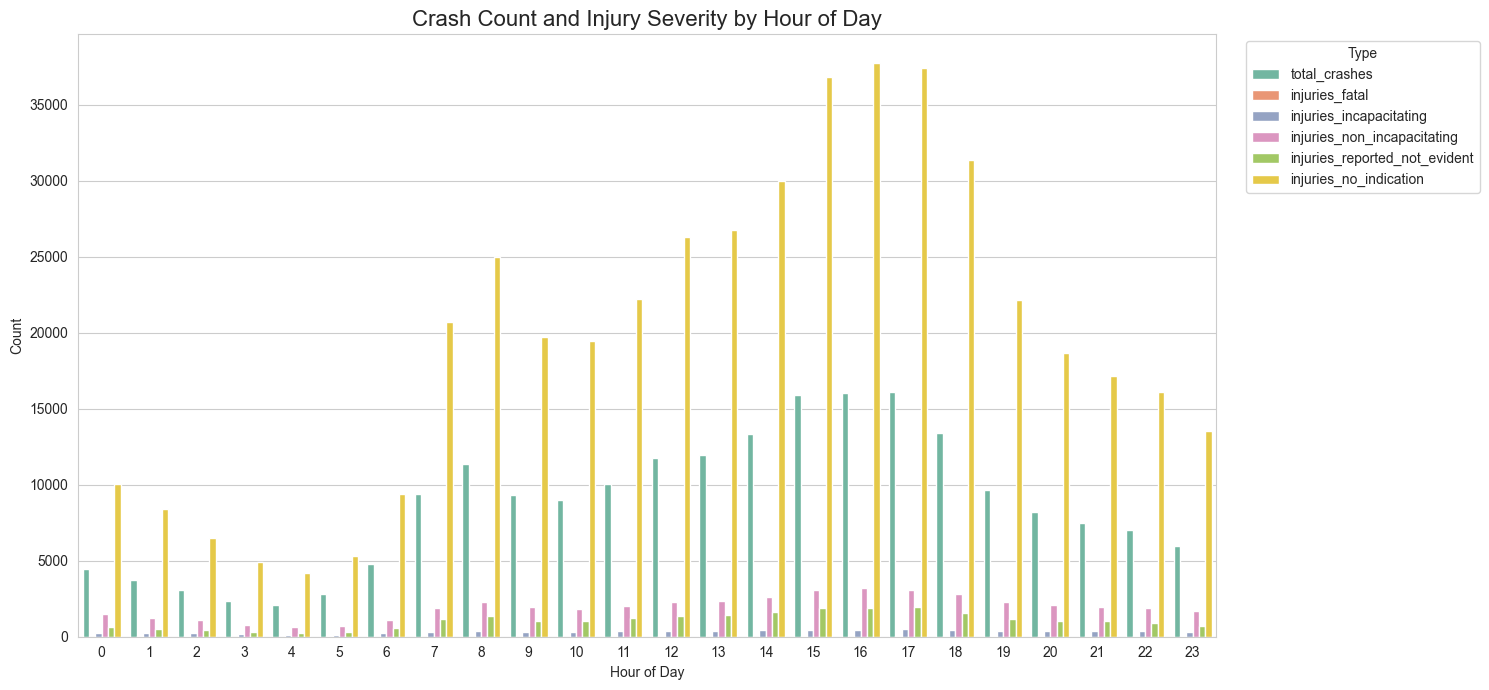

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 부상 컬럼
injury_cols = [
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_non_incapacitating',
    'injuries_reported_not_evident',
    'injuries_no_indication'
]

# 필요한 컬럼만 필터링하고 NaN 제거
plot_df = df.dropna(subset=['crash_hour'])[['crash_hour'] + injury_cols]

# 사고 건수 추가 (각 행이 한 사고를 나타낸다고 가정)
plot_df['total_crashes'] = 1

# crash_hour 기준 집계
agg = plot_df.groupby('crash_hour').agg({
    'total_crashes': 'sum',
    **{col: 'sum' for col in injury_cols}
}).reset_index()

# melt for seaborn
melted = agg.melt(id_vars='crash_hour', var_name='type', value_name='count')

# 시각화
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=melted, x='crash_hour', y='count', hue='type', palette='Set2')

plt.title("Crash Count and Injury Severity by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

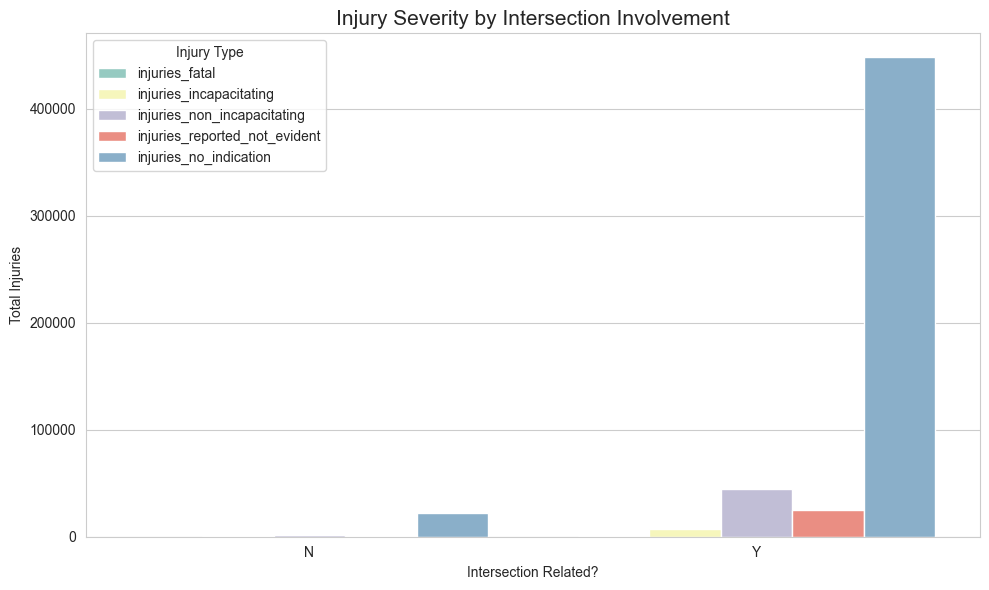

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 컬럼
injury_cols = [
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_non_incapacitating',
    'injuries_reported_not_evident',
    'injuries_no_indication'
]

# 교차로 여부 결측 제거 및 데이터 집계
injury_df = df.dropna(subset=['intersection_related_i'])[injury_cols + ['intersection_related_i']]
agg_injury = injury_df.groupby('intersection_related_i')[injury_cols].sum().reset_index()

# long format 변환
melted = agg_injury.melt(id_vars='intersection_related_i', 
                         var_name='injury_type', value_name='count')

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='intersection_related_i', y='count', hue='injury_type', palette='Set3')

plt.title("Injury Severity by Intersection Involvement", fontsize=15)
plt.xlabel("Intersection Related?")
plt.ylabel("Total Injuries")
plt.legend(title="Injury Type")
plt.tight_layout()
plt.show()

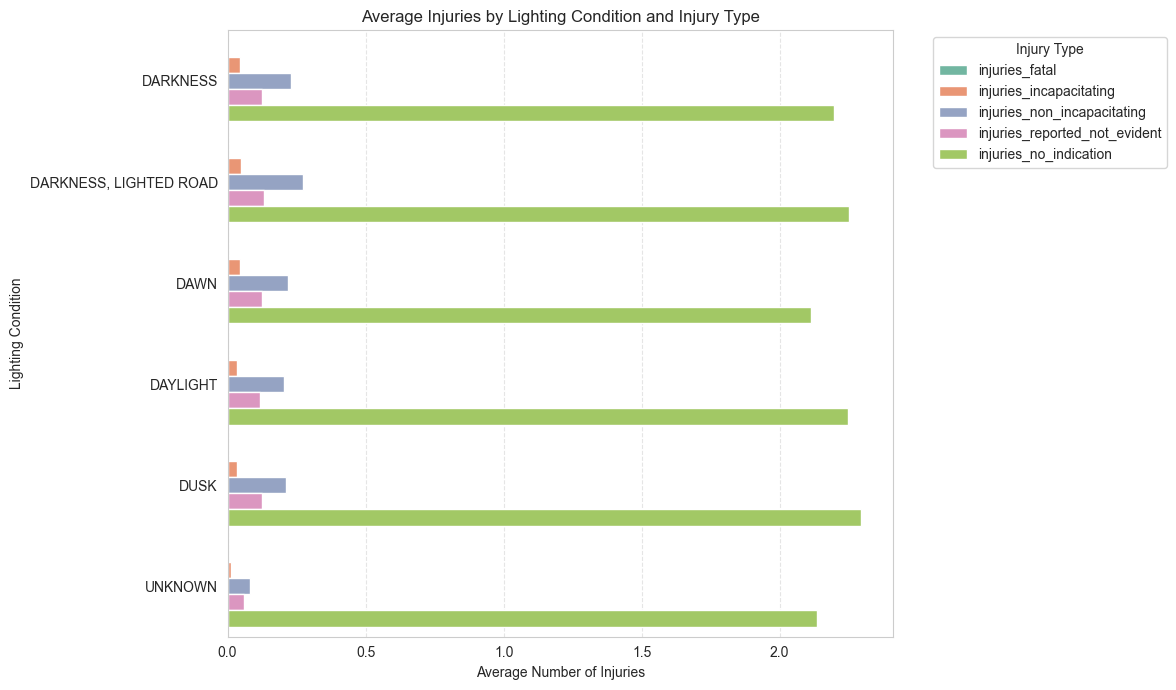

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사용할 부상 종류
injury_cols = [
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_non_incapacitating',
    'injuries_reported_not_evident',
    'injuries_no_indication'
]

# 평균 집계
avg_injuries_by_light = df.groupby('lighting_condition')[injury_cols].mean().sort_index()

# 데이터 길게 변형
melted = avg_injuries_by_light.reset_index().melt(
    id_vars='lighting_condition', var_name='injury_type', value_name='avg_injuries'
)

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=melted, y='lighting_condition', x='avg_injuries', hue='injury_type', palette='Set2')

plt.xlabel("Average Number of Injuries")
plt.ylabel("Lighting Condition")
plt.title("Average Injuries by Lighting Condition and Injury Type")
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 학습을 위한 feature 스케일링
- 각 변수들이 가지고 있는 'UNKNOWN' 컬럼은 부상정도와의 관련도 낮기 때문에 학습에 도움이 되지 못하므로 삭제
- severe_injury 조건에 따라 4등급의 부상정도를 정의하여 각 사고들을 분류할 라벨을 생성
- 모두 범주형 변수이며, crash_hour 또한 거리와 같은 특별한 의미를 가지는 수치가 아니므로 스케일링 미진행

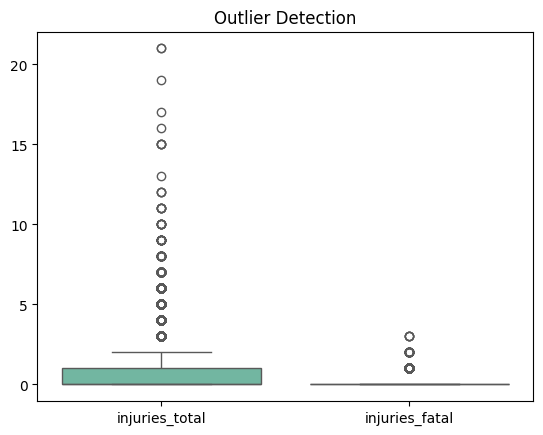

In [89]:
sns.boxplot(data=df[['injuries_total', 'injuries_fatal']])
plt.title("Outlier Detection")
plt.show()

In [126]:
df['crash_severity'] = np.where(df['injuries_fatal'] > 0, 'Fatal',
                                np.where(df['injuries_incapacitating'] > 0, 'Incapacitating',
                                         np.where(df['injuries_non_incapacitating'] > 0, 'Non-Incapacitating',
                                                  'No Injury')))

# Verify the new features
df[['injuries_total', 'crash_severity']].head()

,injuries_total,crash_severity
0,0.0,No Injury
1,0.0,No Injury
2,0.0,No Injury
3,5.0,Non-Incapacitating
4,0.0,No Injury


In [ ]:
# 범주형 변수들에 대한 count plot 결과 조도, traffic way type, 교차로 여부, 요일과 시간대가 사고 수와 관련이 있었음.

from sklearn.preprocessing import LabelEncoder

features = ['lighting_condition', 'intersection_related_i', 'trafficway_type', 'crash_hour', 'crash_day_of_week', 'crash_severity']
df = df[features]

### unknown 변수 제거 필요 ###


label_encoders = {}
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le 
df

,lighting_condition,intersection_related_i,trafficway_type,crash_hour,crash_day_of_week,crash_severity
0,0.523918,0.223790,0.313495,-0.066541,-0.468901,2
1,-1.337798,0.223790,-0.249254,-2.386310,0.020431,2
2,0.523918,0.223790,2.283114,-0.601873,0.509764,2
3,0.523918,0.223790,-0.249254,1.004122,1.488429,3
4,0.523918,0.223790,2.283114,0.111903,-0.468901,2
...,...,...,...,...,...,...
209301,2.385634,0.223790,-0.249254,-0.066541,1.488429,2
209302,0.523918,0.223790,0.313495,0.111903,0.999097,2
209303,0.523918,-4.468483,-1.374750,-0.066541,1.488429,1
209304,0.523918,0.223790,2.283114,0.290346,-0.958234,3


In [130]:
from sklearn.model_selection import train_test_split

X = df.drop('crash_severity', axis=1)
y = df['crash_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.2/150.0 MB 1.7 MB/s eta 0:01:26
   ---------------------------------------- 0.5/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 0.8/150.0 MB 4.0 MB/s eta 0:00:38
   ---------------------------------------- 1.1/150.0 MB 4.8 MB/s eta 0:00:32
   ---------------------------------------- 1.4/150.0 MB 5.1 MB/s eta 0:00:30
   ---------------------------------------- 1.8/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.0/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.4/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 2.6/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 2.9/150.0 MB 5.9 MB/s eta 0:00:2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\whene\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [98]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 3.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 4.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.5 MB 4.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\whene\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 다양한 분류모델의 학습 진행
- knn, logistic regression은 거리기반이므로 스케일링 진행된 상태
- 나머지 tree 기반 모델은 스케일링 미진행된 상태
- 각 모델 별 하이퍼파라미터 값 후보들을 설정해놓고 gridsearchcv를 통해 테스트
- 각 모델의 평균 성능 지표를 통해 최적의 모델과 파라미터 선정 및 학습 결과 시각화

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 모델과 그리드 정의
models_params = {
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs"]
    }),
    "DecisionTree": (DecisionTreeClassifier(random_state=42), {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    }),
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "max_depth": [5, 10, None]
    }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1]
    }),
    "HistGradientBoosting": (HistGradientBoostingClassifier(random_state=42), {
        "max_iter": [100, 200],
        "learning_rate": [0.05, 0.1]
    }),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }),
    "LightGBM": (LGBMClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "num_leaves": [15, 31]
    })
}

results = {}

for name, (model, params) in models_params.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "BestParams": grid.best_params_
    }

    print(f"{name} - Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}")
    print(f"  Best Params: {grid.best_params_}")
    print("-" * 50)

# 성능이 가장 좋은 모델 찾기 (F1-score 기준)
best_model = max(results, key=lambda x: results[x]["F1-Score"])
print(f"\nBest Model: {best_model}")
print(f"Metrics: {results[best_model]}")

Running GridSearchCV for KNN...
KNN - Acc: 0.8042, Prec: 0.6916, Rec: 0.8042, F1: 0.7300
  Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
--------------------------------------------------
Running GridSearchCV for LogisticRegression...
LogisticRegression - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'C': 0.01, 'solver': 'lbfgs'}
--------------------------------------------------
Running GridSearchCV for DecisionTree...
DecisionTree - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'criterion': 'gini', 'max_depth': 3}
--------------------------------------------------
Running GridSearchCV for RandomForest...
RandomForest - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'max_depth': 5, 'n_estimators': 50}
--------------------------------------------------
Running GridSearchCV for GradientBoosting...
GradientBoosting - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'learning_rate': 0.05, 'n_estimators

C:\Users\whene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:20:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
--------------------------------------------------
Running GridSearchCV for LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 146492, number of used features: 5
[LightGBM] [Info] Start training from score -6.430894
[LightGBM] [Info] Start training from score -3.480895
[LightGBM] [Info] Start training from score -0.201373
[LightGBM] [Info] Start training from score -1.897111
LightGBM - Acc: 0.8134, Prec: 0.6616, Rec: 0.8134, F1: 0.7297
  Best Params: {'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 15}
--------------------------------------------------

Best Model: KNN
Me

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.03      0.00      0.00      2054
           2       0.81      0.99      0.89     51067
           3       0.16      0.01      0.02      9547

    accuracy                           0.81     62783
   macro avg       0.25      0.25      0.23     62783
weighted avg       0.69      0.81      0.73     62783



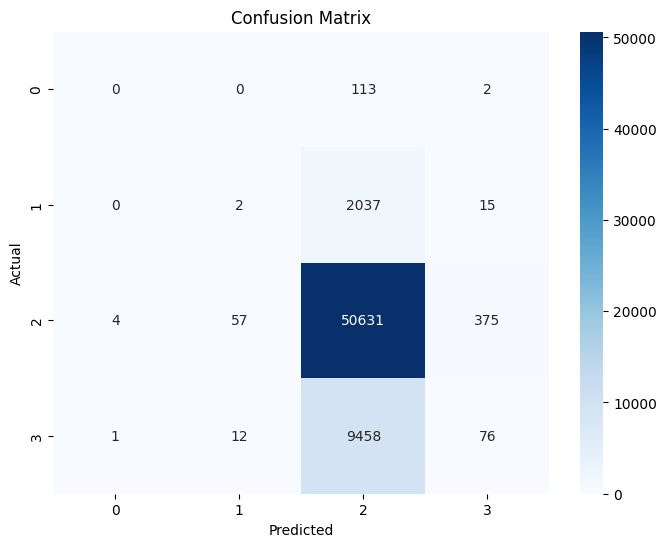

In [ ]:
## 예시 코드 ##

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()